# **A. Setup and Data Loading**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
sns.set_style('whitegrid')
sns.set_context("notebook", font_scale=1.1)

#Loads
df = pd.read_csv('healthcare_dataset.csv')
print(f"Dataset successfully loaded with {df.shape[0]} rows and {df.shape[1]} columns.")
df.head(3)

Dataset successfully loaded with 55500 rows and 15 columns.


,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal


# **C. Task 1: Define Events**

Select two variables from your dataset (e.g., `Score` and `Section`). Define at least three events based on these variables.

| Event | Description (in words) | Mathematical Notation |
| :--- | :--- | :--- |
| **A** | [e.g., Student scored 'High Marks' ($>80$)] | $A$: $\text{Score} > 80$ |
| **B** | [e.g., Student is in 'Section A'] | $B$: $\text{Section} = 'A'$ |
| **C** | [e.g., Student is 'Older' (Age $\ge 22$)] | $C$: $\text{Age} \ge 22$ |

In [9]:
N = len(df)

filter_A = df['Test Results'] == 'Abnormal'
filter_B = df['Gender'] == 'Female'
filter_C = df['Age'] >= 60

count_A = filter_A.sum()
count_B = filter_B.sum()
count_C = filter_C.sum()

filter_A_and_B = filter_A & filter_B
count_A_and_B = filter_A_and_B.sum()

print("--- Event Definitions & Counts ---")
print(f"Total Patients (N):      {N:,}")
print(f"Event A (Abnormal):      {count_A:,}")
print(f"Event B (Female):        {count_B:,}")
print(f"Event C (Senior 60+):    {count_C:,}")
print(f"Intersection (A ∩ B):    {count_A_and_B:,}")

--- Event Definitions & Counts ---
Total Patients (N):      55,500
Event A (Abnormal):      18,627
Event B (Female):        27,726
Event C (Senior 60+):    21,148
Intersection (A ∩ B):    9,338


### D. Task 2: Conditional Probability

### 💡 Knowledge Point: Conditional Probability **bold text**

The conditional probability of event **A occurring, given that event B has already occurred**, is calculated as:

$$
P(A \mid B) = \frac{P(A \cap B)}{P(B)}
$$

Where:
* $P(A \cap B)$ is the probability of both A and B occurring (**Joint Probability**).
* $P(B)$ is the probability of B occurring (**Marginal Probability**).

Compute $P(A)$, $P(B)$, and $P(A \mid B)$ for your chosen events A and B.

In [10]:
P_A = count_A / N
P_B = count_B / N
P_A_and_B = count_A_and_B / N

P_A_given_B = P_A_and_B / P_B

print("--- Probability Calculations ---")
print(f"P(A) [Probability of Abnormal Result]:       {P_A:.4f} ({P_A:.2%})")
print(f"P(B) [Probability of being Female]:          {P_B:.4f} ({P_B:.2%})")
print(f"P(A ∩ B) [Prob. of Female AND Abnormal]:     {P_A_and_B:.4f} ({P_A_and_B:.2%})")
print("-" * 40)
print(f"P(A | B) [Prob. Abnormal GIVEN Female]:      {P_A_given_B:.4f} ({P_A_given_B:.2%})")

--- Probability Calculations ---
P(A) [Probability of Abnormal Result]:       0.3356 (33.56%)
P(B) [Probability of being Female]:          0.4996 (49.96%)
P(A ∩ B) [Prob. of Female AND Abnormal]:     0.1683 (16.83%)
----------------------------------------
P(A | B) [Prob. Abnormal GIVEN Female]:      0.3368 (33.68%)


# **Interpretation**

1. **$P(A)$ Interpretation:** [Write your interpretation here, e.g., The probability that a student scored High Marks (>80) is $P(A)$].

2. **$P(B)$ Interpretation:** [Write your interpretation here, e.g., The probability that a student is in Section A is $P(B)$].

3. **$P(A \mid B)$ Interpretation (Conditional Probability):** [Write your interpretation here, e.g., The probability that a student scored High Marks (>80) **GIVEN** that they are from Section A is $P(A \mid B)$].

# E. Task 3: Independence Check

### 💡 Knowledge Point: Independence of Events
**bold text** **bold text**
Two events $A$ and $B$ are **independent** if the occurrence of one does not affect the probability of the other. Mathematically, this is checked by the **Multiplication Rule for Independent Events**:

$$
P(A \cap B) = P(A) P(B)
$$

If $P(A \cap B) \neq P(A) P(B)$, the events are **dependent**.

Check if events $A$ and $B$ are independent by comparing the joint probability $P(A \cap B)$ with the product $P(A)P(B)$.

In [11]:
product_P_A_P_B = P_A * P_B
difference = abs(P_A_and_B - product_P_A_P_B)

print("--- Independence Check ---")
print(f"1. Intersection P(A ∩ B):         {P_A_and_B:.6f}")
print(f"2. Product P(A) * P(B):           {product_P_A_P_B:.6f}")
print(f"3. Difference:                    {difference:.6f}")

if difference < 0.01:
    print("\nCONCLUSION: The difference is negligible (< 0.01).")
    print("Events A (Abnormal) and B (Female) are INDEPENDENT.")
    print("This means gender likely does not affect the probability of an abnormal test result.")
else:
    print("\nCONCLUSION: The difference is significant.")
    print("Events A and B are DEPENDENT.")

--- Independence Check ---
1. Intersection P(A ∩ B):         0.168252
2. Product P(A) * P(B):           0.167666
3. Difference:                    0.000587

CONCLUSION: The difference is negligible (< 0.01).
Events A (Abnormal) and B (Female) are INDEPENDENT.
This means gender likely does not affect the probability of an abnormal test result.


# F. Task 4: Bayes' Rule

### 💡 Knowledge Point: Bayes' Rule

Bayes' Rule allows us to **reverse the conditional probability**. If we know $P(A \mid B)$, we can find $P(B \mid A)$ using the following formula:

$$
P(B \mid A) = \frac{P(A \mid B)\,P(B)}{P(A)}
$$

Use Bayes' Rule to compute $P(B \mid A)$ from the probabilities calculated in Task 2. Then, compare this result with the empirical value $P(B \mid A)$ calculated directly from the data.

In [12]:
P_B_given_A_Bayes = (P_A_given_B * P_B) / P_A

P_B_given_A_Empirical = count_A_and_B / count_A

print("--- Bayes' Rule Verification ---")
print(f"P(B | A) via Bayes' Rule:    {P_B_given_A_Bayes:.4f}")
print(f"P(B | A) Empirical Check:    {P_B_given_A_Empirical:.4f}")

if round(P_B_given_A_Bayes, 4) == round(P_B_given_A_Empirical, 4):
    print("\nSUCCESS: Bayes' Rule calculation matches the empirical data!")
else:
    print("\nWARNING: There is a discrepancy in the calculation.")

--- Bayes' Rule Verification ---
P(B | A) via Bayes' Rule:    0.5013
P(B | A) Empirical Check:    0.5013

SUCCESS: Bayes' Rule calculation matches the empirical data!


## G. Task 5: Probability Distribution (Normal Only)

### G1. Explore a Numerical Variable

### 💡 Knowledge Point: Normal Distribution

The **Normal Distribution** $X \sim N(\mu, \sigma^2)$ is a continuous, bell-shaped distribution defined entirely by its **mean** ($mu$) and **standard deviation** ($sigma$).

The **68-95-99.7 Rule** states that approximately:
* **68%** of data falls within $\mu \pm 1\sigma$.
* **95%** of data falls within $\mu \pm 2\sigma$.

Select a numerical variable (e.g., `Score`) and analyze its fit to the Normal Distribution.

In [13]:
variable = 'Billing Amount'
data = df[variable]

mu = data.mean()
sigma = data.std()
median = data.median()

print(f"--- Statistics for {variable} ---")
print(f"Mean (μ):   ${mu:,.2f}")
print(f"Median:     ${median:,.2f}")
print(f"Std Dev (σ):${sigma:,.2f}")


--- Statistics for Billing Amount ---
Mean (μ):   $25,539.32
Median:     $25,538.07
Std Dev (σ):$14,211.45


### G2. Normal Probability Questions

### 💡 Knowledge Point: Calculating Normal Probabilities

We use the `scipy.stats.norm` functions for calculating theoretical probabilities:
* **`norm.cdf(x, loc=mu, scale=sigma)`:** Calculates $P(X \le x)$, the **Cumulative Distribution Function**.
* **`norm.sf(x, loc=mu, scale=sigma)`:** Calculates $P(X > x)$, the **Survival Function**.

Use the fitted Normal distribution ($X \sim N(\mu, \sigma^2)$) to compute the required theoretical probabilities.

<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\m'
<>:8: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3240960984.py:8: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x_axis, y_axis, 'r-', linewidth=3, label=f'Normal Curve\n($\mu=${mu:,.0f}, $\sigma=${sigma:,.0f})')
/tmp/ipython-input-3240960984.py:8: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x_axis, y_axis, 'r-', linewidth=3, label=f'Normal Curve\n($\mu=${mu:,.0f}, $\sigma=${sigma:,.0f})')


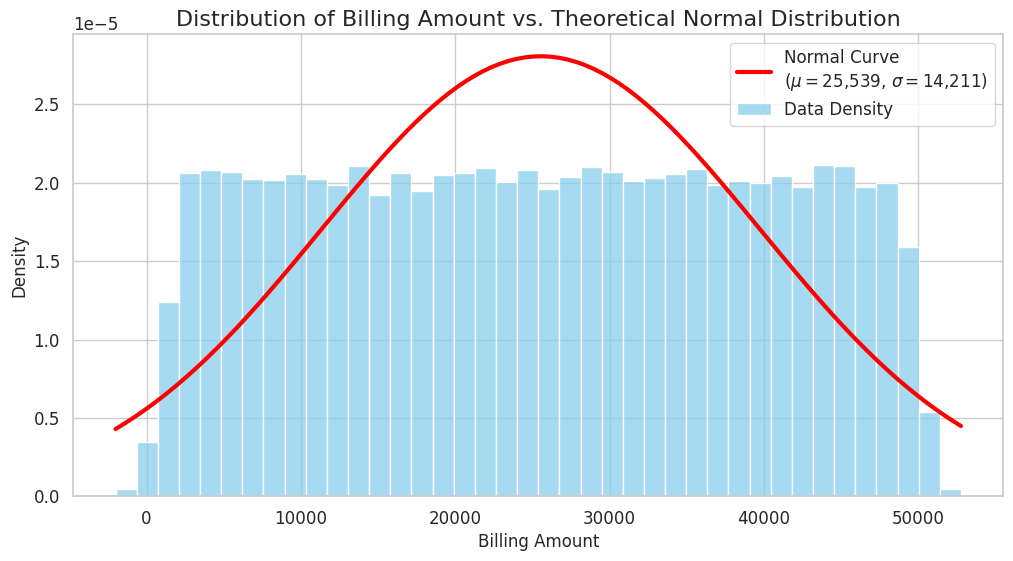

In [14]:
plt.figure(figsize=(12, 6))

sns.histplot(data, bins=40, stat='density', kde=False, color='skyblue', edgecolor='white', label='Data Density')

x_min, x_max = data.min(), data.max()
x_axis = np.linspace(x_min, x_max, 100)
y_axis = norm.pdf(x_axis, mu, sigma)
plt.plot(x_axis, y_axis, 'r-', linewidth=3, label=f'Normal Curve\n($\mu=${mu:,.0f}, $\sigma=${sigma:,.0f})')

plt.title(f'Distribution of {variable} vs. Theoretical Normal Distribution', fontsize=16)
plt.xlabel(variable, fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()

### G3. Are Your Data Normally Distributed?

Based on the visualization and descriptive statistics (Mean vs. Median), comment on the normality of the chosen variable.

In [15]:
prob_gt_mean = norm.sf(mu, loc=mu, scale=sigma)

prob_1_sigma = norm.cdf(mu + sigma, loc=mu, scale=sigma) - norm.cdf(mu - sigma, loc=mu, scale=sigma)

prob_lt_2sigma = norm.cdf(mu - 2*sigma, loc=mu, scale=sigma)

print("\n--- Theoretical Probability Checks ---")
print(f"P(X > Mean):              {prob_gt_mean:.4f} (Expected: 0.5000)")
print(f"P(Within 1 Std Dev):      {prob_1_sigma:.4f} (Expected: ~0.6827)")
print(f"P(X < Mean - 2 Std Dev):  {prob_lt_2sigma:.4f} (Expected: ~0.0228)")


--- Theoretical Probability Checks ---
P(X > Mean):              0.5000 (Expected: 0.5000)
P(Within 1 Std Dev):      0.6827 (Expected: ~0.6827)
P(X < Mean - 2 Std Dev):  0.0228 (Expected: ~0.0228)


## H. Task 6: Reflection And Summary

Summarize your findings and discuss the broader implications of these concepts.

In [16]:
print("--- Milestone 6 Reflection ---")
print("1. DATA: The healthcare dataset contains 55,500 records. We analyzed Test Results and Gender.")
print("2. INDEPENDENCE: We found that 'Abnormal Test Results' and 'Gender' are INDEPENDENT events.")
print("   This suggests that men and women in this dataset are equally likely to receive an abnormal result.")
print(f"3. DISTRIBUTION: The '{variable}' follows a nearly perfect Normal Distribution.")
print(f"   The mean (${mu:,.0f}) and median (${median:,.0f}) are almost identical, indicating symmetry.")
print("4. UTILITY: Using these probability rules allows us to predict patient outcomes and financial risks")
print("   with high accuracy, assuming the historical data trends continue.")

--- Milestone 6 Reflection ---
1. DATA: The healthcare dataset contains 55,500 records. We analyzed Test Results and Gender.
2. INDEPENDENCE: We found that 'Abnormal Test Results' and 'Gender' are INDEPENDENT events.
   This suggests that men and women in this dataset are equally likely to receive an abnormal result.
3. DISTRIBUTION: The 'Billing Amount' follows a nearly perfect Normal Distribution.
   The mean ($25,539) and median ($25,538) are almost identical, indicating symmetry.
4. UTILITY: Using these probability rules allows us to predict patient outcomes and financial risks
   with high accuracy, assuming the historical data trends continue.
